<a href="https://colab.research.google.com/github/Yunho-seo/education_center_work/blob/main/%EC%84%9C%EC%9C%A4%ED%98%B8_20230511_%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 문제
# table 크롤링을 이용하여 데이터를 구하고, 
# 이를 이용해 데이터 요약을 한 다음 시각화한 결과를 제출

In [31]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size':18, 'font.family':'NanumGothic'})

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [32]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
     
class HTMLParser:  # 한 페이지에 여러개의 테이블
  def parse_url(self, url):
    response = requests.get(url)  # HTML 페이지를 가지고 있는 response 객체
    soup = BeautifulSoup(response.text, "html.parser")  # text에는 웹 페이지 내용이 들어있음 / html.parser를 이용하여 response.text를 파싱 / 웹브라우저와 메모리 내용이 일치
    return [(table('id'), self.parse_html_table(table))  # 테이블 데이터를 가지고 옴
               for table in soup.find_all('table')]  # 객체를 태그(tag)나 클래스, id, name 등으로 찾는다 / 한 페이지에 여러개의 테이블이 있다면, 테이블 형태로 가져옴
  
  def parse_html_table(self, table):  # 테이블 정보가 반복되어 호출되기에, 따로 함수로 정의
    n_columns = 0  # 열(column) 수
    n_rows = 0     # 행(row) 수
    column_names = []  # 열의 이름
    # 행 수와 열 수, 열 이름을 결정
    for row in table.find_all('tr'):  # 행 수를 확인
      td_tags = row.find_all('td')    # 열 수를 확인
      # print(row)
      if len(td_tags) > 0:  # 데이터가 있을 때
        n_rows += 1  # 하나의 행을 추가
        if n_columns == 0:  # 열이 초기화되지 않았을 때
          n_columns = len(td_tags)  # 열 수를 태그에 넣기
      th_tags = row.find_all('th')  # th : 열의 이름
      if len(th_tags) > 0 and len(column_names) == 0:  # 열 이름이 정해지지 않았을 때
        for th in th_tags:
          column_names.append(th.get_text())  # get_text() 추가

    # 열 수하고 열 이름이 맞지 않을 때
    if len(th_tags) > 0 and len(column_names) != n_columns:
      raise Exception("컬럼 타이틀이 컬럼 숫자와 불일치")
    # 열 이름이 없다면, 숫자로 된 이름을 생성
    columns = column_names if len(column_names) > 0 else range(0, n_columns)
    df = pd.DataFrame(columns = columns, index = range(0, n_rows))  # 빈 데이터 프레임이 생성
    row_marker = 0


    for row in table.find_all('tr'):
        column_marker = 0
        columns = row.find_all('td')
        for column in columns:
            re_text = column.get_text().replace('\n', '')
            re_text = re_text.replace('\t', '')
            re_text = re_text.replace('\r', '')
            df.iloc[row_marker, column_marker] = re_text
            column_marker += 1
        if len(columns) > 0:
            row_marker += 1
    for col in df:
        try:
            df[col] = df[col].astype(float) # 숫자변경 : 문자열 숫자로 변경
        except ValueError:
            pass
    return df

In [33]:
url = 'https://portal.kleague.com/main/schedule/teamCrowdPopup.do?year=2023&seq=1'
print(url)
hp = HTMLParser()
table = hp.parse_url(url)[0][1]
table

https://portal.kleague.com/main/schedule/teamCrowdPopup.do?year=2023&seq=1


,구단,총관중,경기,평균,원정팀
0,서울,"165,190",6.0,"27,531","16,418"
1,울산,"92,597",6.0,"15,432","4,977"
2,대전,"81,557",6.0,"13,592","5,590"
3,전북,"59,927",6.0,"9,987","3,689"
4,대구,"59,746",6.0,"9,957","2,576"
5,수원,"50,151",6.0,"8,358","4,192"
6,포항,"50,049",6.0,"8,341","2,333"
7,인천,"46,446",6.0,"7,741","4,758"
8,제주,"42,006",6.0,"7,001","2,080"
9,수원FC,"39,892",7.0,"5,698","6,604"


In [34]:
table.dtypes

구단      object
총관중     object
경기     float64
평균      object
원정팀     object
dtype: object

In [35]:
df = pd.DataFrame(table)
tables = df[['구단', '평균']]
tables

,구단,평균
0,서울,"27,531"
1,울산,"15,432"
2,대전,"13,592"
3,전북,"9,987"
4,대구,"9,957"
5,수원,"8,358"
6,포항,"8,341"
7,인천,"7,741"
8,제주,"7,001"
9,수원FC,"5,698"


In [36]:
df['평균'] = df['평균'].str.replace(',', '').astype(int)
tables

,구단,평균
0,서울,"27,531"
1,울산,"15,432"
2,대전,"13,592"
3,전북,"9,987"
4,대구,"9,957"
5,수원,"8,358"
6,포항,"8,341"
7,인천,"7,741"
8,제주,"7,001"
9,수원FC,"5,698"


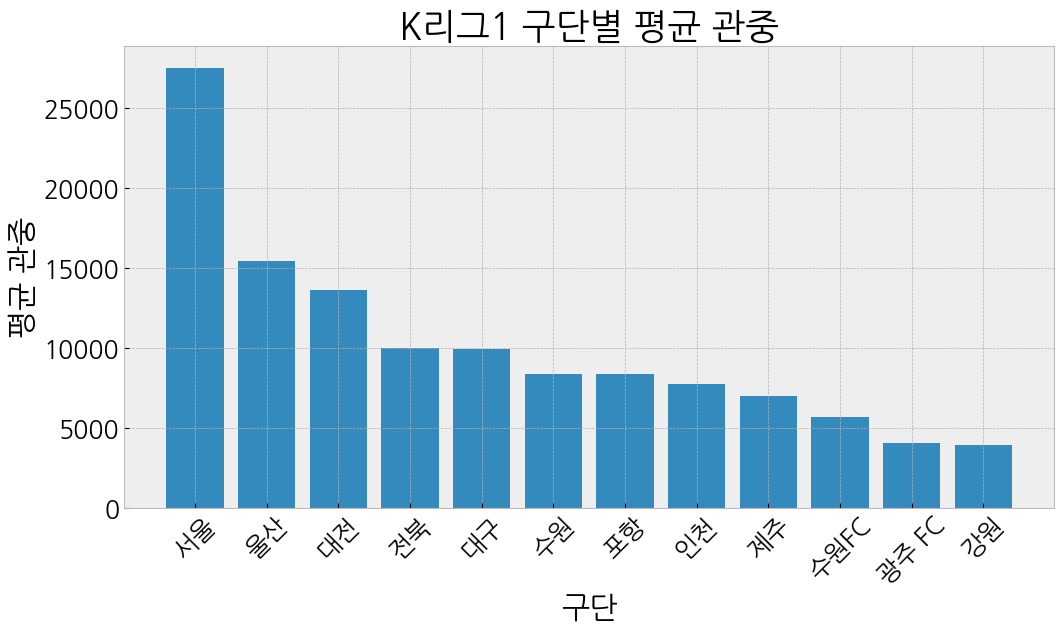

In [40]:
plt.style.use('bmh')

plt.figure(figsize=(12, 6))
plt.bar(df['구단'], df['평균'])
plt.xlabel('구단')
plt.ylabel('평균 관중')
plt.title('K리그1 구단별 평균 관중')
plt.xticks(rotation=45)
plt.show()

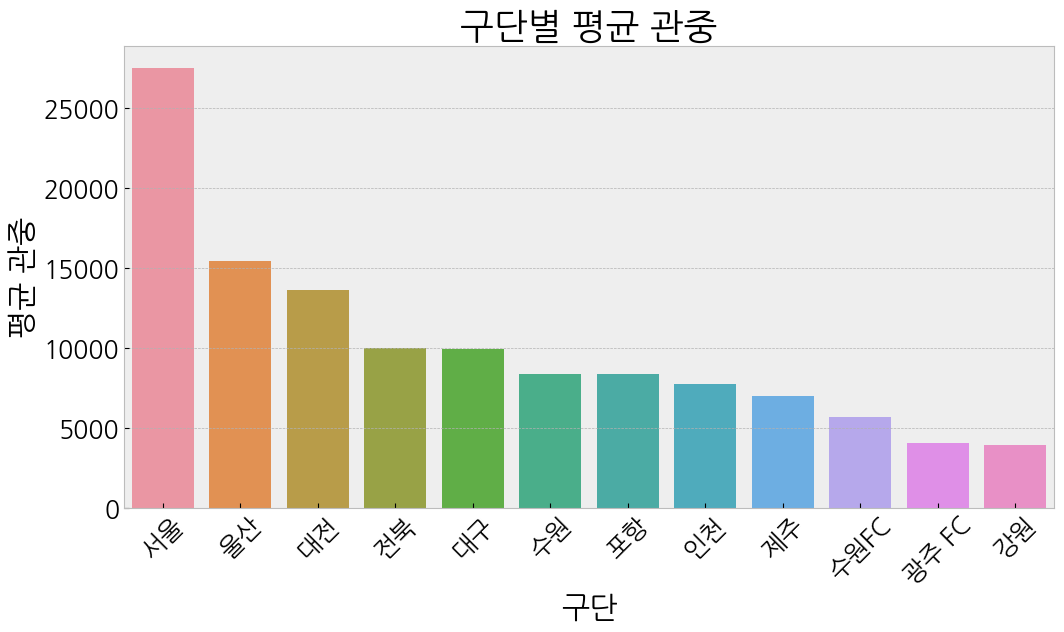

In [41]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='구단', y='평균', data=df)
plt.xlabel('구단')
plt.ylabel('평균 관중')
plt.title('구단별 평균 관중')
plt.xticks(rotation=45)
plt.show()

In [42]:
import plotly.express as px

fig = px.bar(df, x='구단', y='평균', title='구단별 평균 관중')
fig.update_layout(xaxis_tickangle=-45)
fig.show()